## Work
1. 試改變 monitor "Validation Accuracy" 並比較結果
2. 調整 earlystop 的等待次數至 10, 25 並比較結果

In [1]:
import os
import keras
import matplotlib.pyplot as plt
%matplotlib inline


# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization
def build_mlp(input_shape, output_units=10, num_nueron=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_nueron):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation='relu', name='hidden_layer'+str(i+1))(input_layer)
            
            x = BatchNormalization()(x)
            
        else:
            x = keras.layers.Dense(units=n_units, activation='relu', name='hidden_layer'+str(i+1))(x)
            
            x = BatchNormalization()(x)
            
    out = keras.layers.Dense(units=output_units, activation='softmax', name='output')(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95
MONITOR = ['val_accuracy', 'val_loss']
PATIENCE = [5, 10, 25]

In [9]:
# 載入 Callbacks
"""Code Here
設定 callbacks: Earlystop
"""
from keras.callbacks import EarlyStopping


results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
import itertools
for monitor, patience in itertools.product(MONITOR, PATIENCE):
    keras.backend.clear_session()
    print('Experiment earlystop wit monitor:%s, patience:%s' %(monitor,patience))
    model = build_mlp(x_train.shape[1:])
    model.summary()
    
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)
    
    earlystop = EarlyStopping(monitor=monitor,
                              patience=patience,
                              verbose=1)
    model.fit(x_train, y_train, 
              epochs=EPOCHS,
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True, 
              callbacks=[earlystop])
    
    #Collect result
    exp_name_tag = "minitor %s, patience %s" % (monitor, patience)
    results[exp_name_tag] = {'train-loss':model.history.history['loss'], 
                             'valid-loss':model.history.history['val_loss'], 
                             'train-acc':model.history.history['accuracy'], 
                             'valid-acc':model.history.history['val_accuracy']}

Experiment earlystop wit monitor:val_accuracy, patience:5
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
b

50000/50000 [==============================] - 7s 133us/step - loss: 1.5402 - accuracy: 0.4622 - val_loss: 1.7112 - val_accuracy: 0.4030
Epoch 5/50
50000/50000 [==============================] - 7s 135us/step - loss: 1.4852 - accuracy: 0.4829 - val_loss: 1.6386 - val_accuracy: 0.4330
Epoch 6/50
50000/50000 [==============================] - 7s 143us/step - loss: 1.4409 - accuracy: 0.4957 - val_loss: 1.5825 - val_accuracy: 0.4530
Epoch 7/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.4014 - accuracy: 0.5116 - val_loss: 1.5523 - val_accuracy: 0.4575
Epoch 8/50
50000/50000 [==============================] - 7s 132us/step - loss: 1.3667 - accuracy: 0.5225 - val_loss: 1.5241 - val_accuracy: 0.4676
Epoch 9/50
50000/50000 [==============================] - 7s 138us/step - loss: 1.3354 - accuracy: 0.5328 - val_loss: 1.5054 - val_accuracy: 0.4686
Epoch 10/50
50000/50000 [==============================] - 7s 139us/step - loss: 1.3041 - accuracy: 0.5452 - val_loss: 1.49

Epoch 7/50
50000/50000 [==============================] - 7s 141us/step - loss: 1.3993 - accuracy: 0.5111 - val_loss: 1.5465 - val_accuracy: 0.4485
Epoch 8/50
50000/50000 [==============================] - 7s 142us/step - loss: 1.3637 - accuracy: 0.5255 - val_loss: 1.5255 - val_accuracy: 0.4575
Epoch 9/50
50000/50000 [==============================] - 7s 142us/step - loss: 1.3303 - accuracy: 0.5385 - val_loss: 1.5003 - val_accuracy: 0.4639
Epoch 10/50
50000/50000 [==============================] - 7s 146us/step - loss: 1.3006 - accuracy: 0.5472 - val_loss: 1.5007 - val_accuracy: 0.4621
Epoch 11/50
50000/50000 [==============================] - 8s 151us/step - loss: 1.2731 - accuracy: 0.5588 - val_loss: 1.4803 - val_accuracy: 0.4722
Epoch 12/50
50000/50000 [==============================] - 7s 146us/step - loss: 1.2464 - accuracy: 0.5682 - val_loss: 1.4697 - val_accuracy: 0.4775
Epoch 13/50
50000/50000 [==============================] - 8s 151us/step - loss: 1.2194 - accuracy: 0.5785 - 

Epoch 2/50
50000/50000 [==============================] - 7s 147us/step - loss: 1.7578 - accuracy: 0.3873 - val_loss: 1.9632 - val_accuracy: 0.3007
Epoch 3/50
50000/50000 [==============================] - 8s 150us/step - loss: 1.6318 - accuracy: 0.4291 - val_loss: 1.8426 - val_accuracy: 0.3553
Epoch 4/50
50000/50000 [==============================] - 7s 149us/step - loss: 1.5595 - accuracy: 0.4538 - val_loss: 1.7283 - val_accuracy: 0.4033
Epoch 5/50
50000/50000 [==============================] - 7s 139us/step - loss: 1.5017 - accuracy: 0.4745 - val_loss: 1.6438 - val_accuracy: 0.4235
Epoch 6/50
50000/50000 [==============================] - 7s 139us/step - loss: 1.4567 - accuracy: 0.4903 - val_loss: 1.5923 - val_accuracy: 0.4388
Epoch 7/50
50000/50000 [==============================] - 7s 140us/step - loss: 1.4181 - accuracy: 0.5025 - val_loss: 1.5492 - val_accuracy: 0.4557
Epoch 8/50
50000/50000 [==============================] - 7s 139us/step - loss: 1.3813 - accuracy: 0.5194 - val_

Epoch 23/50
50000/50000 [==============================] - 7s 146us/step - loss: 0.9933 - accuracy: 0.6665 - val_loss: 1.4667 - val_accuracy: 0.4899
Epoch 24/50
50000/50000 [==============================] - 7s 143us/step - loss: 0.9718 - accuracy: 0.6742 - val_loss: 1.4523 - val_accuracy: 0.4925
Epoch 25/50
50000/50000 [==============================] - 7s 145us/step - loss: 0.9492 - accuracy: 0.6824 - val_loss: 1.4634 - val_accuracy: 0.4922
Epoch 26/50
50000/50000 [==============================] - 7s 147us/step - loss: 0.9304 - accuracy: 0.6902 - val_loss: 1.4672 - val_accuracy: 0.4906
Epoch 27/50
50000/50000 [==============================] - 7s 147us/step - loss: 0.9095 - accuracy: 0.6990 - val_loss: 1.4749 - val_accuracy: 0.4929
Epoch 28/50
50000/50000 [==============================] - 7s 145us/step - loss: 0.8893 - accuracy: 0.7061 - val_loss: 1.4876 - val_accuracy: 0.4900
Epoch 29/50
50000/50000 [==============================] - 7s 146us/step - loss: 0.8702 - accuracy: 0.7117

50000/50000 [==============================] - 8s 151us/step - loss: 0.7243 - accuracy: 0.7692 - val_loss: 1.5201 - val_accuracy: 0.4973
Epoch 38/50
50000/50000 [==============================] - 8s 151us/step - loss: 0.7044 - accuracy: 0.7771 - val_loss: 1.5324 - val_accuracy: 0.4990
Epoch 39/50
50000/50000 [==============================] - 8s 152us/step - loss: 0.6860 - accuracy: 0.7851 - val_loss: 1.5449 - val_accuracy: 0.4973
Epoch 40/50
50000/50000 [==============================] - 8s 152us/step - loss: 0.6709 - accuracy: 0.7894 - val_loss: 1.5653 - val_accuracy: 0.4965
Epoch 41/50
50000/50000 [==============================] - 8s 155us/step - loss: 0.6509 - accuracy: 0.7983 - val_loss: 1.5761 - val_accuracy: 0.4997
Epoch 42/50
50000/50000 [==============================] - 8s 152us/step - loss: 0.6318 - accuracy: 0.8063 - val_loss: 1.5743 - val_accuracy: 0.4950
Epoch 00042: early stopping


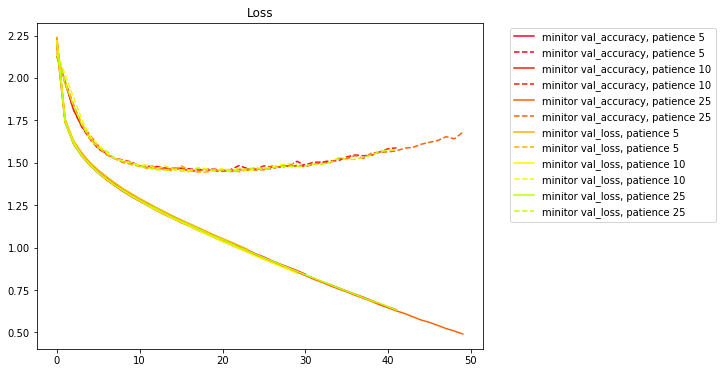

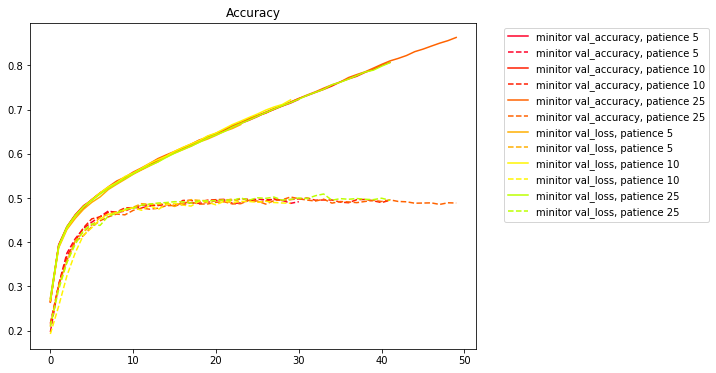

In [10]:
"""Code Here
將結果繪出
"""
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
%matplotlib inline
NUM_COLORS = 20

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()